**Assignment 3** for the course of *Selected Topics in Music and Acoustic Engineering* : 

***Machine Learning for Audio and Acoustic Engineering*** 

helded by Professor *Maximo Cobos*.

---

STUDENTS GROUP:

+ **Fotios Koutsoukos**, ID: 941257

+ **Antonio Giganti**, ID: 925671

Link to the **[Google Colab](https://colab.research.google.com/drive/1ryGz0UBAD2pI04xYlajkhHhoG-p_OFS0?usp=sharing)** file.


If the textlink is not clickable, copy & paste the following link in your browser:
https://colab.research.google.com/drive/1ryGz0UBAD2pI04xYlajkhHhoG-p_OFS0?usp=sharing

---

# **Lab 3: Neural Networks**


In this lab we will start to work with deep learning models. We will begin by looking at simple examples with synthetically generated data. Then, you will move to a more challenging and realistic problem.

### **Exercise 1**: Approximating Synthetic Data

Execute the following lines for create a synthetically generated dataset:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [ ]:
def gen_data(size, a, b):
  x = np.random.rand(size,1)-0.5
  y = a*x + b
  y = y*(x>0)
  y = y + 0.2*(np.random.randn(*x.shape))
  return x, y

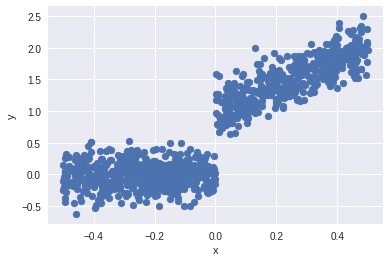

In [ ]:
# Create data and plot
Xdata, Ydata = gen_data(1000, 2, 1)
plt.scatter(Xdata,Ydata);
plt.xlabel('x');
plt.ylabel('y');

Describe the function underlying the model used to generate the data. Complete the symbols "?"

\begin{equation}
  y(x)=\begin{cases}
    2 *x + 1 + 0.2 *  \mathcal{N}(0, 1) & \text{if } x >0 \text{ ,where } x=\mathcal{U}(0, 1) - 0.5\\
     0.2 *  \mathcal{N}(0, 1), & \text{otherwise}.
  \end{cases}
\end{equation}


### **Exercise 2**: Create a MLP neural network model using Keras

Create the following fully-connected feedforward network using Keras' sequential model. Use:

*   ReLU activation in the hidden layers.
*   Linear activation in the output layer.

Show the model's summary.

![](https://drive.google.com/uc?export=view&id=1UJwycQXQG8kkF0N8CmDW-ED-hY-Uck5o)



In [ ]:
# Fully-connected MLP

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

How many parameters has the model?

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


Compile the model and train it on Xdata using the SGD optimizer with learning rate 0.01. Train the model until reaching 300 epochs.

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='MSE')

# Training the model
history = model.fit(Xdata, Ydata, epochs=300)

Plot the training history of the network, showing the evolution of the training loss.

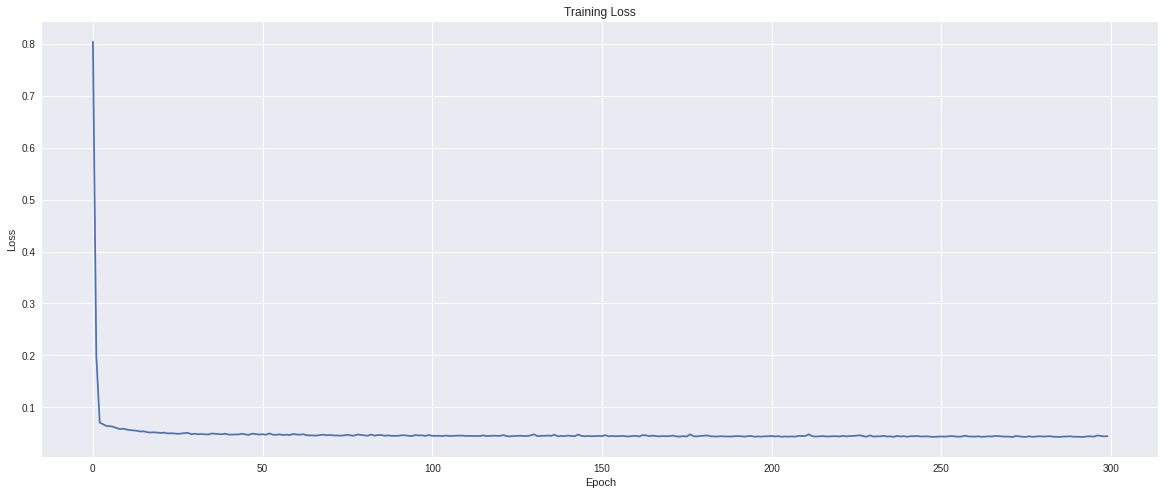

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss']) 
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss');

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [ ]:
loss_history = history.history['loss']
min_loss = np.min(loss_history)
min_loss_index = np.where(loss_history == min_loss)
print('Minumum Loss on the Training Set: ', min_loss , ' obtained at epoch: ' , ''.join(map(str, min_loss_index[0])) )

Minumum Loss on the Training Set:  0.04276440665125847  obtained at epoch:  271


Plot the true training data together with the approximated data using the predictions.

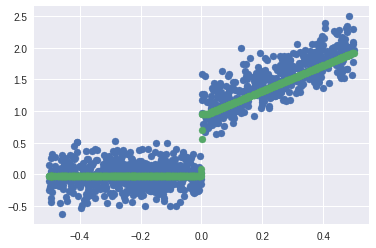

In [ ]:
#predicted data
preds = model.predict(Xdata)

plt.scatter(Xdata,Ydata)
plt.scatter(Xdata,preds);

Now initialize the model again and fit it, but train it for 1000 epochs.

In [ ]:
# Fully-connected MLP

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='MSE')

# Training the model
history = model.fit(Xdata, Ydata, epochs=1000)

Plot the original data and the predicted data. What are the differences observed with respect to the case before?

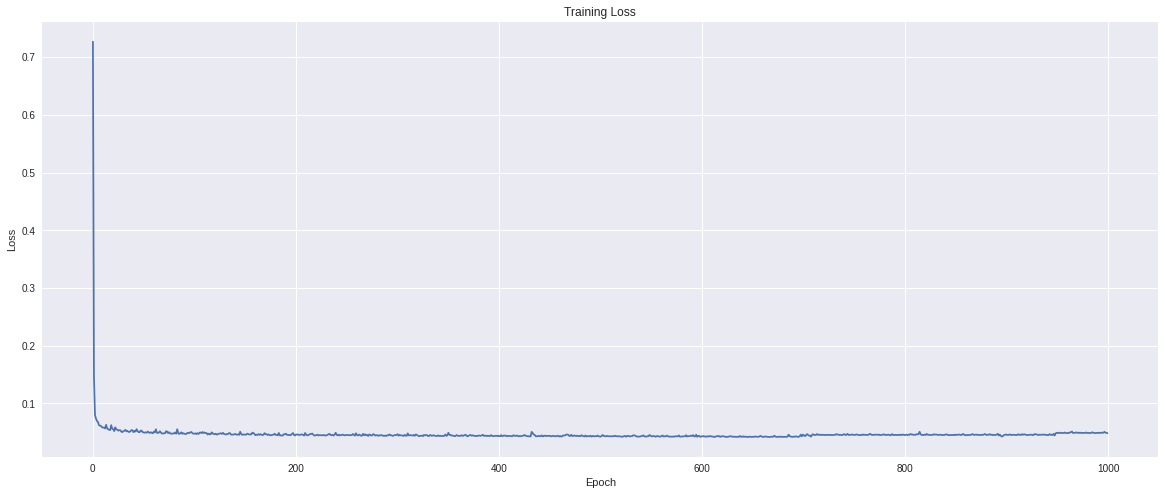

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss']) 
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss');

What is the best loss achieved in this case?

In [ ]:
loss_history = history.history['loss']
min_loss = np.min(loss_history)
min_loss_index = np.where(loss_history == min_loss)
print('Minumum Loss on the Training Set: ', min_loss , ' obtained at epoch: ' , ''.join(map(str, min_loss_index[0])) )

Minumum Loss on the Training Set:  0.041902899742126465  obtained at epoch:  645


*Indeed, after a certain epoch the two models have converged to the same local minima and more training epochs will not provide a significantly better result in the loss function.*

### **Exercise 3**: Classification

Generate synthetically two bivariate Gaussian vectors, each one with 1000 samples:

*   Xdata0, with mean [-1,-1] and covariance [[4,0],[0,4]]
*   Xdata1, with mean [1,1] and covariance [[3,0],[0,3]]





In [ ]:
#Bivariate Gaussian

mean0 = [-1, -1]
cov0 = [[4, 0], [0, 4]]

mean1 = [1, 1]
cov1 = [[3, 0], [0, 3]]

Xdata0 = np.random.multivariate_normal(mean0, cov0, 1000)
Xdata1 = np.random.multivariate_normal(mean1, cov1, 1000)

print(Xdata0.shape, Xdata1.shape)

(1000, 2) (1000, 2)


From the above Gaussian vectors, stack them to generate a feature data matrix Xdatac with shape (2000,2) and the corresponding label vector Ydatac with zeros and ones of shape (2000,)

In [ ]:
#Features
Xdatac = np.concatenate((Xdata0,Xdata1),axis=0)
Xdatac.shape

#Labels
labels0 = np.zeros(Xdata0.shape[0])
labels1 = np.ones(Xdata1.shape[0])
labels_gt = np.concatenate((labels0,labels1),axis=0).T

print(Xdatac.shape, labels_gt.shape)

(2000, 2) (2000,)


Create a scatterplot of the two classes:

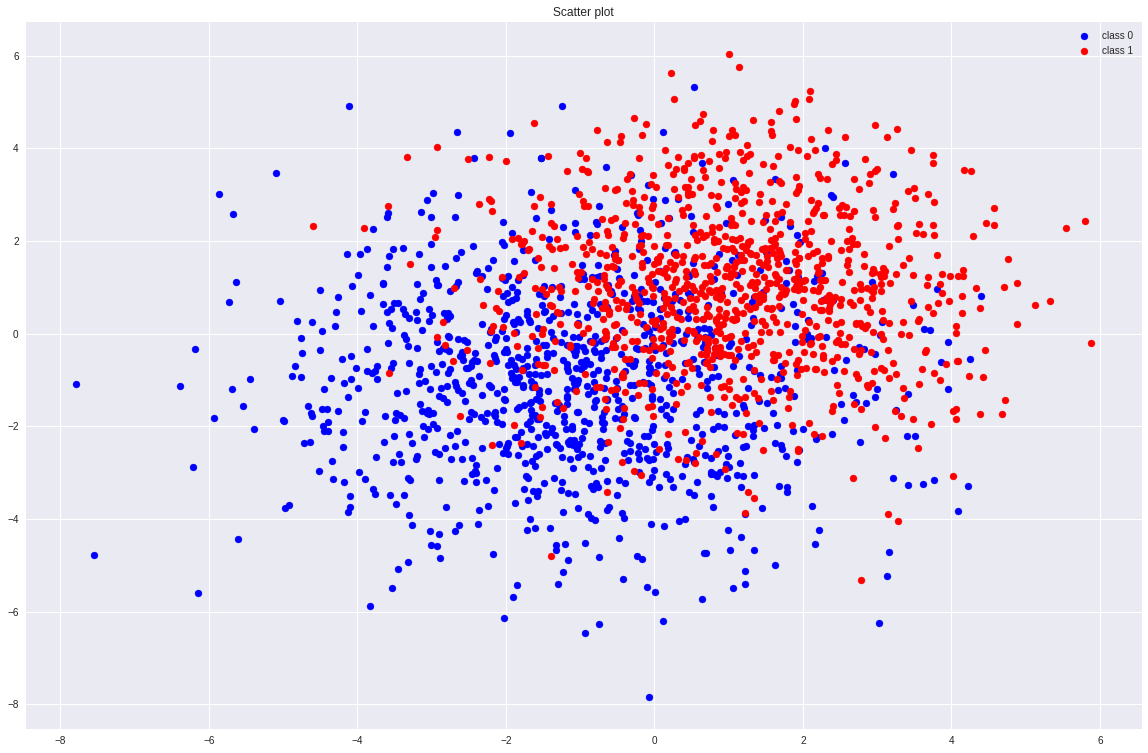

In [ ]:
#Features Scatter Plot 
plt.figure(figsize=(20,13))
plt.scatter(Xdatac[labels_gt==0,0], Xdatac[labels_gt==0,1], c='b')
plt.scatter(Xdatac[labels_gt==1,0], Xdatac[labels_gt==1,1], c='r')
plt.title('Scatter plot')
plt.legend(('class 0','class 1'));

Divide the data Xdatac into a training partition and validation partition using "train_test_split" from sklearn. Use 30% of your data for validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(Xdatac, labels_gt, test_size=0.3)

Create a model identical to the one of Exercise 2 but use sigmoid activation in the output layer. You need also now to specify that the input has two values.

Train the model on the training partion. Select as loss function "binary_crossentropy" and monitor the training accuracy using metrics=["accuracy"]. Use also the validation partition to track the validation accuracy at each epoch.

In [ ]:
# Fully-connected MLP

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy' , metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=300)

Plot the training history showing the training accuracy and validation accuracy.

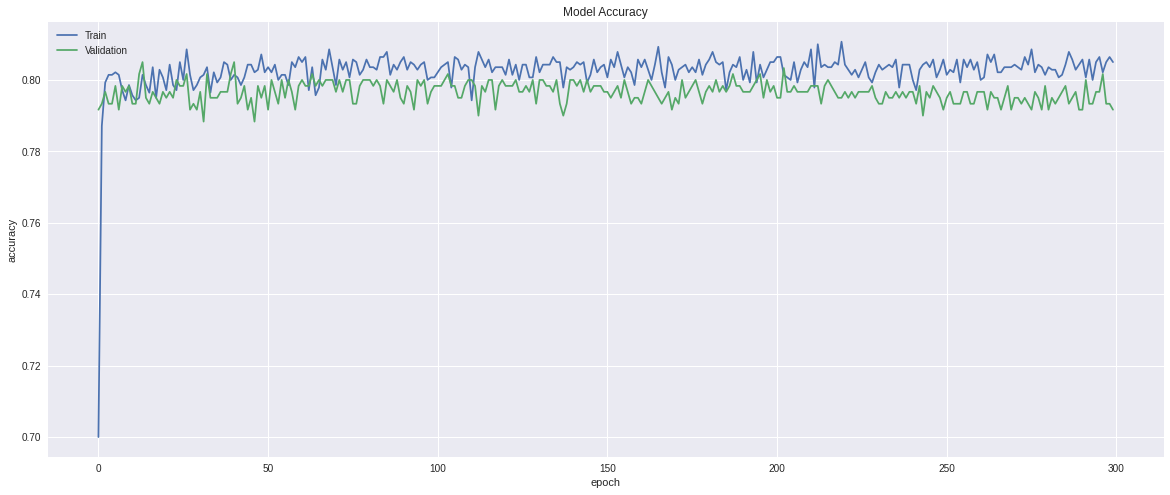

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('Training Loss')
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation']);

Predict over the training data and create a scatter plot showing the predicted class for each data example.

In [ ]:
#Prediction
preds = model.predict(X_train)
preds = np.squeeze(preds)
print(preds.shape)

(1400,)


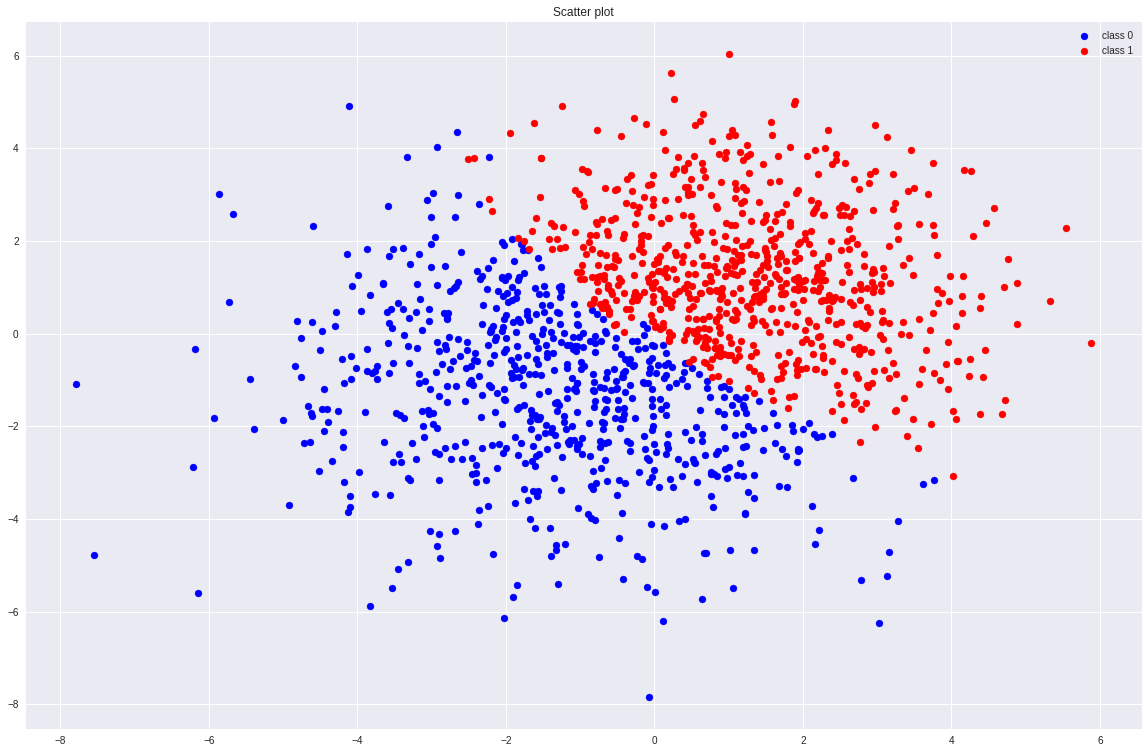

In [ ]:
plt.figure(figsize=(20,13))
plt.scatter(X_train[preds<0.5,0], X_train[preds<0.5,1], c='b')
plt.scatter(X_train[preds>0.5,0], X_train[preds>0.5,1], c='r')
plt.title('Scatter plot')
plt.legend(('class 0','class 1'));

### **Exercise 4**: Data Preparation


Follow the same steps in Lab 2 to download the ESC-50 dataset.

In [ ]:
!apt-get install subversion

In [ ]:
!svn checkout https://github.com/karolpiczak/ESC-50/trunk/audio

The Github repository specifies the following naming convention:

2000 audio recordings in WAV format (5 seconds, 44.1 kHz, mono) with the following naming convention:

{FOLD}-{CLIP_ID}-{TAKE}-{TARGET}.wav

{FOLD} - index of the cross-validation fold,

{CLIP_ID} - ID of the original Freesound clip,

{TAKE} - letter disambiguating between different fragments from the same Freesound clip,

{TARGET} - class in numeric format [0, 49].

In [ ]:
# Get a list of all audio files and get the class label for each file
audiofiles = [str(file) for file in Path().glob('audio/*.wav')]
labels = []
for i,file in enumerate(audiofiles):
  fileid = file.split('.wav')[-2]
  target = fileid.split('-')[-1]
  labels.append(int(target))

Create a list of the files corresponding to the 10 first classes. Those files will form our dataset (400 signals).

In [ ]:
files = [audiofiles[i] for i,l in enumerate(labels) if l<10]
labels = [l for l in labels if l<10]

Create a list storing the signals from all the files:

In [ ]:
signals = list(librosa.load(file)[0] for file in files)

For each signal in the list, compute the melspectrogram with librosa using default parameters:

In [ ]:
mel_spegrams = []
for signal in signals:
  mel_specgram = librosa.feature.melspectrogram(signal)
  mel_spegrams.append(mel_specgram)

Convert the list to a numpy array called Xdata. You should end up with an array of shape (400, 128, 216). What do these numbers mean?

In [ ]:
Xdata = np.asarray(mel_spegrams)
Xdata.shape

(400, 128, 216)

*400 is the number of signals, 128 is the number of mel frequency bins, 216 is the number of frames.* 

*Each of the 400 signals, is composed of 216 frames, and for each frame there are 128 values for the corresponding mel frequency bins.*

### **Exercise 5**: MLP Classification

Let's try now to classify the audio files by using the computed mel spectrogram data. First, flatten each spectrogram into a one-dimensional array, so that you end up with a new array Xdata_f of shape (400, 27648). You can do that by using the function reshape from numpy.

In [ ]:
Xdata_f = Xdata.reshape(400,-1)
print(Xdata_f.shape)

(400, 27648)


Let's first use the preprocessing.scale function to scale the data (save the output in Xdata_s)

In [ ]:
Xdata_s = sklearn.preprocessing.scale(Xdata_f)

Create a test and validation split with 20% of the samples. Call the splits X_train, y_train, X_val, y_val.

In [ ]:
y = np.asarray(labels)
X_train, X_val, y_train, y_val = train_test_split(Xdata_s ,y, test_size=0.2)

Now, create a MLP-based network for classifying these audios. You can use the same layer structure as in the previous examples, but remember to adapt the output layer so that its size is equal to the number of classes and apply 'softmax' activation. You can also try to increase the number of neurons in the hidden layers.

In [ ]:
shape_size = X_train.shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(shape_size)))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary() 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 16)                442384    
_________________________________________________________________
dense_31 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                170       
Total params: 442,826
Trainable params: 442,826
Non-trainable params: 0
_________________________________________________________________


Fit the model using "sparse_categorical_crossentropy" as loss function. Probably your first attempts will overfit.

Try different strategies to prevent overfitting:

*   Dropout
*   Regularization
*   Reduce number of neurons/layers

What is the best accuracy you could get with a fully-based MLP network?


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

# Training the model
history_2_layers_16_units = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=300)


In [ ]:
val_loss_history = history_2_layers_16_units.history['val_loss']
val_accuracy_history = history_2_layers_16_units.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
max_val_accuracy = np.max(val_accuracy_history)

min_val_loss_index = np.where(val_loss_history == min_val_loss)
max_val_accuracy_index = np.where(val_accuracy_history == max_val_accuracy)

print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0])] )

Minimum Loss on the Validation Set:  4.908610820770264  obtained at epoch:  0   with an Accuracy of:  0.16249999403953552


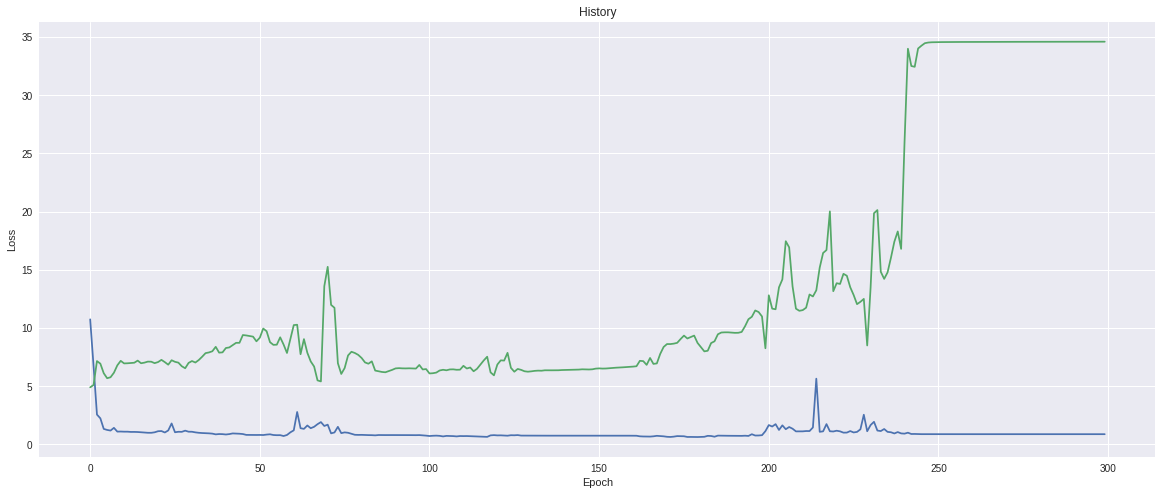

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history_2_layers_16_units.history['loss']) 
plt.plot(history_2_layers_16_units.history['val_loss']) 
plt.title('History')
plt.xlabel('Epoch')
plt.ylabel('Loss');

**Prevent Overfitting**

*Take 1*

In [ ]:
SEED = 1234

#tuning parameters
dropout = 0.1
reguralization = 0.01
units = 16 #neurons

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(shape_size)))
model.add(tf.keras.layers.Dense(units=units,
                                activation='relu',
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),
                                kernel_regularizer=tf.keras.regularizers.l2(reguralization)))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(units=units,
                                activation='relu',
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),
                                kernel_regularizer=tf.keras.regularizers.l2(reguralization)))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(units=10,
                                activation='softmax',
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED)))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                442384    
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_19 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                170       
Total params: 442,826
Trainable params: 442,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

# Training the model
history_regularized = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=300)

In [ ]:
val_loss_history = history_regularized.history['val_loss']
val_accuracy_history = history_regularized.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
max_val_accuracy = np.max(val_accuracy_history)

min_val_loss_index = np.where(val_loss_history == min_val_loss)
max_val_accuracy_index = np.where(val_accuracy_history == max_val_accuracy)

print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0])] )

Minimum Loss on the Validation Set:  2.955235719680786  obtained at epoch:  51   with an Accuracy of:  0.4625000059604645


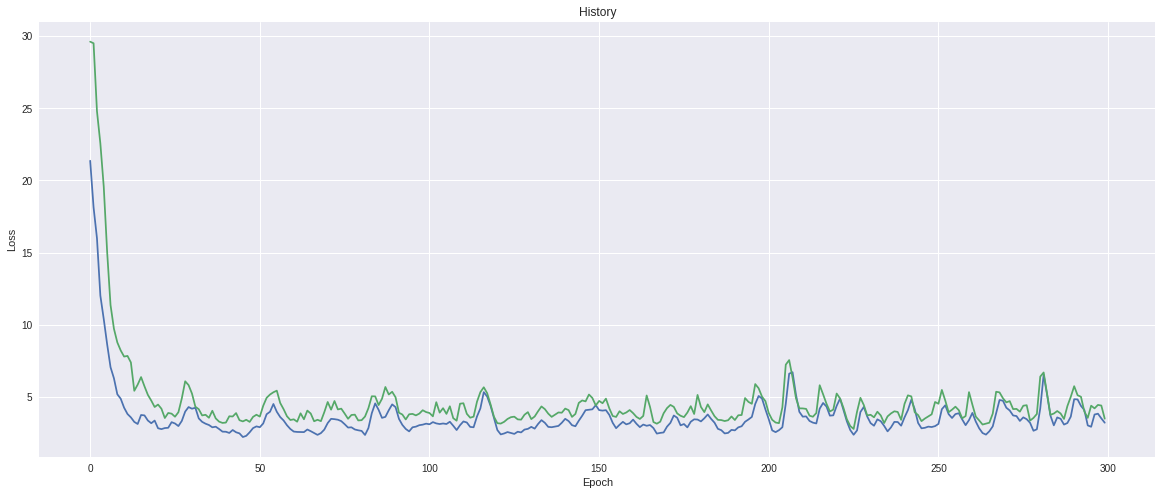

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history_regularized.history['loss']) 
plt.plot(history_regularized.history['val_loss']) 
plt.title('History')
plt.xlabel('Epoch')
plt.ylabel('Loss');

### **Exercise 6**: CNN

Create training and validation partitions from Xdata. Remember that Xdata stores has size (400, 128, 216), storing 400 Mel spectrograms of sie (128,216). Name the partitions X_train, X_test, y_train and y_test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xdata ,y, test_size=0.2)

Scale each spectrogram by substracting its mean and dividing by its standard deviation.

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_s = []
X_test_s = []

for spec in X_train:
  X_train_s.append(scaler.fit_transform(spec))

for spec in X_test:
  X_test_s.append(scaler.fit_transform(spec))

X_train_s = np.asarray(X_train_s)
X_test_s = np.asarray(X_test_s)

print(X_train_s.shape)
print(X_test.shape)

(320, 128, 216)
(80, 128, 216)


Create a convolutional neural network model. Remember to adapt the input shape of the first layer to the new input. 

You can start with a model like the next one. Remember to include regularization strategies like dropout layers.

![](https://drive.google.com/uc?export=view&id=1WRY3iOCsOdZaeLLslqSFKcJ7Bs-Q0iI9)


In [ ]:
# expanding X_train_s and X_test_s to fit conv2d
X_train_sx = np.expand_dims(X_train_s, axis=-1)
X_test_sx = np.expand_dims(X_test_s, axis=-1)

In [ ]:
#create a convolutional structure
input_shape = (X_train_sx.shape[1], X_train_sx.shape[2], X_train_sx.shape[3])
model = tf.keras.models.Sequential()
#1st Conv layer
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((3,3), strides=(3,3), padding='same'))
#2nd Conv layer
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2), padding='same'))
#3rd Conv layer
model.add(tf.keras.layers.Conv2D(32, (2,2), activation='relu'))
#flat the output
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 214, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 72, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 70, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 35, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 34, 32)        2080      
_________________________________________________________________
flatten (Flatten)            (None, 20672)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)               

Fit the model and try to improve the results obtained with the MLP model.

In [ ]:
#train the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit the model
history = model.fit(X_train_sx, y_train, validation_data=(X_test_sx, y_test), batch_size=32, epochs=100)

Plot the training history:

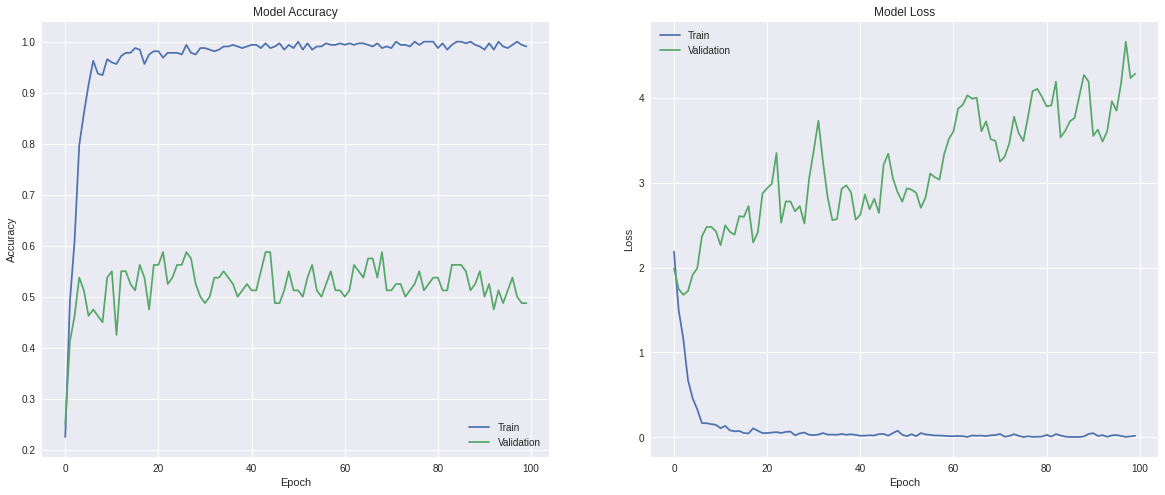

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation']);

In [ ]:
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
max_val_accuracy = np.max(val_accuracy_history)

min_val_loss_index = np.where(val_loss_history == min_val_loss)
max_val_accuracy_index = np.where(val_accuracy_history == max_val_accuracy)

print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0])] )

Minimum Loss on the Validation Set:  1.6780030727386475  obtained at epoch:  2   with an Accuracy of:  0.4625000059604645


Tune your model and try to achieve an accuracy above 60%.

In [ ]:
#tuning parameters
dropout = 0.1
regularization = 0.1

#create a convolutional structure
input_shape = (X_train_sx.shape[1], X_train_sx.shape[2], X_train_sx.shape[3])
model = tf.keras.models.Sequential()
#1st Conv layer
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(regularization)))
model.add(tf.keras.layers.MaxPooling2D((3,3), strides=(3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(dropout))
#2nd Conv layer
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regularization)))
model.add(tf.keras.layers.MaxPooling2D((2,2), strides=(2,2), padding='same'))
model.add(tf.keras.layers.Dropout(dropout))
#3rd Conv layer
model.add(tf.keras.layers.Conv2D(32, (2,2), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regularization)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(dropout))
#flat the output
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(regularization)))
model.add(tf.keras.layers.Dropout(dropout))
#output layer
model.add(tf.keras.layers.Dense(10, activation='softmax')) 
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 214, 16)      160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 72, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 42, 72, 16)        64        
_________________________________________________________________
dropout_24 (Dropout)         (None, 42, 72, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 70, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 35, 16)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 20, 35, 16)      

In [ ]:
#train the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit the model
history_regularized = model.fit(X_train_sx, y_train, validation_data=(X_test_sx, y_test), batch_size=32, epochs=100)

In [ ]:
val_loss_history = history_regularized.history['val_loss']
val_accuracy_history = history_regularized.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
max_val_accuracy = np.max(val_accuracy_history)

min_val_loss_index = np.where(val_loss_history == min_val_loss)
max_val_accuracy_index = np.where(val_accuracy_history == max_val_accuracy)

print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0])] )

Minimum Loss on the Validation Set:  1.563930869102478  obtained at epoch:  72   with an Accuracy of:  0.6875


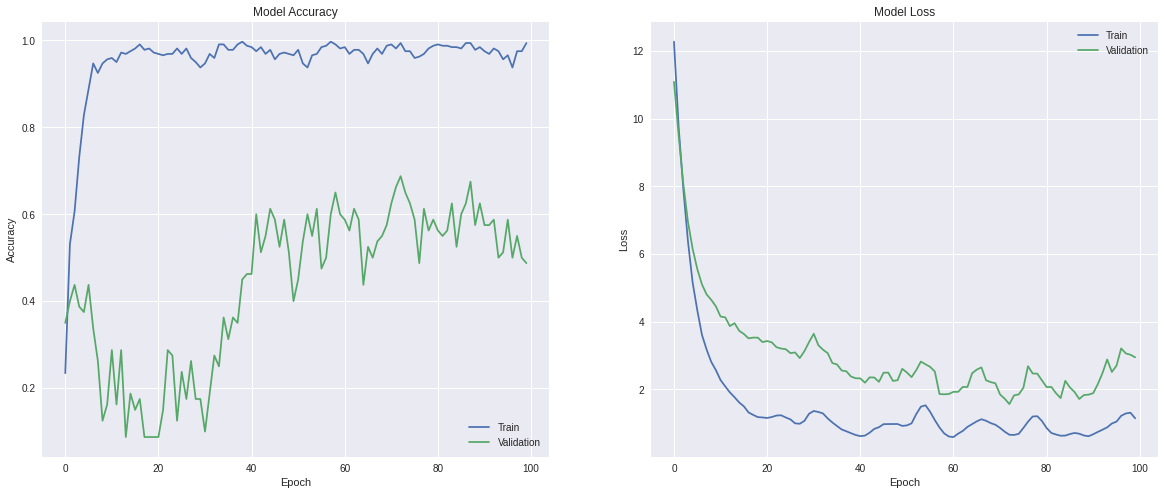

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(history_regularized.history['accuracy']) 
plt.plot(history_regularized.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history_regularized.history['loss']) 
plt.plot(history_regularized.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation']);